In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def center():
    return [2, 3] # or the arg-number of the center.


def args():
    return 'amp', 'x0', 'y0', 'sig_x', 'sig_y', 'theta', 'offset'


def f(coordinates, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    """
    The normal function call for this function. Performs checks on valid arguments, then calls the "raw" function.
    :return:
    """
    if sigma_x > 50 or sigma_y > 50:
        #print('!',end='')
        return 1e10*np.ones(len(coordinates[0])*len(coordinates[0][0]))
    # limit the angle to a small range to prevent unncecessary flips of the axes. The 2D gaussian has two axes of
    # symmetry, so only a quarter of the 2pi is needed.
    if theta > np.pi/4 or theta < -np.pi/4:
        return 1e10*np.ones(len(coordinates[0])*len(coordinates[0][0]))
    res = f_raw(coordinates, amplitude, xo, yo, sigma_x, sigma_y, theta, offset)
    #print('{0: 3.16f}   {1: 3.16f}   {2: 3.16f}   {3: 3.16f}   {4: 3.16f}   {5: 3.16f}   {6: 3.16f}'.format(amplitude, xo, yo, sigma_x, sigma_y, theta, offset))
    return res

def f_notheta(coordinates, amplitude, xo, yo, sigma_x, sigma_y, offset):
    return f(coordinates, amplitude, xo, yo, sigma_x, sigma_y, 0, offset)


def f_noravel(coordinates, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    #if sigma_x > 1 or sigma_y > 1:
    #    return 1e10

    x = coordinates[0]
    y = coordinates[1]
    xo = float(xo)
    yo = float(yo)
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp(- (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
    return g


def f_raw(coordinates, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    """
    The raw function call, performs no checks on valid parameters..
    :return:
    """
    return f_noravel(coordinates, amplitude, xo, yo, sigma_x, sigma_y, theta, offset).ravel()


def f_unc(coordinates, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    """
    similar to the raw function call, but uses unp instead of np for uncertainties calculations.
    :return:
    """
    x = coordinates[0]
    y = coordinates[1]
    xo = float(xo)
    yo = float(yo)
    a = (unp.cos(theta)**2)/(2*sigma_x**2) + (unp.sin(theta)**2)/(2*sigma_y**2)
    b = -(unp.sin(2*theta))/(4*sigma_x**2) + (unp.sin(2*theta))/(4*sigma_y**2)
    c = (unp.sin(theta)**2)/(2*sigma_x**2) + (unp.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*unp.exp(- (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
    return g.ravel()


def areaUnder(amplitude, sigma_x, sigma_y):
    return amplitude * sigma_x * np.sqrt(2 * np.pi) * sigma_y * np.sqrt(2 * np.pi)


def guess(key, values):
    """
    Returns guess values for the parameters of this function class based on the input. Used for fitting using this
    class.
    :param key:
    :param values:
    :return:
    """

In [3]:
mylist = ['a','b','c']
mynums = [1,2,3]
for num, char in zip(mynums, mylist):
    print(char, num)

a 1
b 2
c 3


In [4]:
#from fitters.Gaussian import dip, double_dip, bump, bump2, bump3, bump2r, gaussian
#from fitters.Gaussian import gaussian_2d

In [5]:

photons = 2

def getPhotonNumber(mean):
    # todo! make this shot noise (poisson) instead of randint noise
    return mean + mean*np.random.randint(0,5)
    

In [6]:
def applyEmGain(electronsIn, gain):
    # todo! make this sammple from em gain electron distributions
    return electronsIn*gain

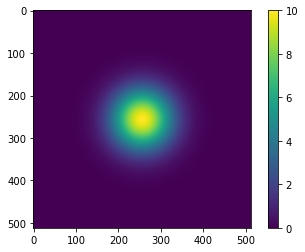

In [7]:
xp = yp = np.arange(512)
XX, YY = np.meshgrid(xp,yp)
psi2d = f_noravel((XX,YY), 10, 256, 256, 50, 50, 0, 0)
plt.imshow(psi2d)
plt.colorbar()

In [8]:
def getBlur(row,col):
    return 5

In [9]:
photonImage = np.zeros((512,512))
image = np.zeros((512,512))
#image += psi2d
readoutnoiseMagnitude = 0
QE = 0.9
emGainSetting = 1000

# determine how many electrons are on a pixel
for rowi, row in enumerate(image):
    for coli, col in enumerate(row):
        # determine if photon
        meanIntensity = psi2d[rowi,coli]
        numPhotonsFromLocationInImage = getPhotonNumber(meanIntensity)
        blurAmount = getBlur(rowi,coli)
        photonImage += f_noravel((XX,YY), rowi, coli, blurAmount, blurAmount, 0, 0, 0)
        

# apply noise       
for rowi, row in enumerate(image):
    for coli, col in enumerate(row):
        numPhotons = photonImage[rowi,coli]
        numelectons = numPhotons * QE
        numberElectronsReadout = applyEmGain(numelectons, emGainSetting)
        image[rowi,coli] += numberElectronsReadout

        if readoutnoiseMagnitude != 0:
            image[rowi,coli] += np.random.randint(readoutnoiseMagnitude)

<ipython-input-2-e9a11a3c36fb>:37: RuntimeWarning: invalid value encountered in double_scalars
  a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
<ipython-input-2-e9a11a3c36fb>:38: RuntimeWarning: invalid value encountered in double_scalars
  b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
<ipython-input-2-e9a11a3c36fb>:39: RuntimeWarning: divide by zero encountered in double_scalars
  c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
<ipython-input-2-e9a11a3c36fb>:40: RuntimeWarning: invalid value encountered in multiply
  g = offset + amplitude*np.exp(- (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))


KeyboardInterrupt: 

In [ ]:
plt.imshow(image)
plt.colorbar()